In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import lib.pgm as libpgm

In [2]:
def array2d(col, row):
    return [[0 for x in range(col)] for y in range(row)]

def convolve2d(image, kernel):
    im_width = len(image[0])
    im_height = len(image)
    kr_size = len(kernel)
    kr_padding = kr_size - 1
    kr_offset = kr_padding / 2
    out_width = im_width - kr_padding
    out_height = im_height - kr_padding
    output = array2d(out_width, out_height)
    
    for r in range(out_height):
        for c in range(out_width):
            for i in range(kr_size):
                for j in range(kr_size):
                    output[r][c] += image[r+i][c+j] * kernel[i][j]
    
    return output
    

In [40]:
image = [
    [1,  2,  3,  4],
    [5,  6,  7,  8],
    [9,  10, 11, 12],
    [13, 14, 15, 16]
]

average = [
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
]

average25 = [
    [1/25, 1/25, 1/25, 1/25, 1/25],
    [1/25, 1/25, 1/25, 1/25, 1/25],
    [1/25, 1/25, 1/25, 1/25, 1/25],
    [1/25, 1/25, 1/25, 1/25, 1/25],
    [1/25, 1/25, 1/25, 1/25, 1/25]
]

edge = [
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
]

edgev = [
    [-1,-1,-1],
    [0,0,0],
    [1,1,1]
]

output = convolve2d(image, average);

print(output)

[[6.0, 7.0], [9.999999999999998, 11.0]]


(589, 589)


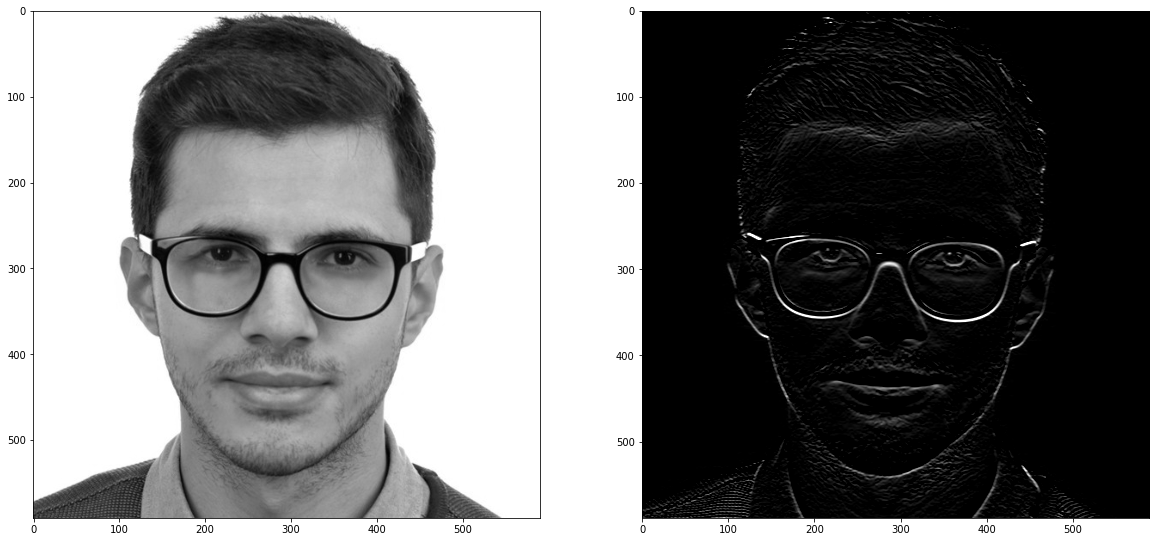

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

pgm_path = '../assets/pgms/gman2.ascii.pgm';

pgm = libpgm.read(pgm_path)

output = convolve2d(np.array(pgm[0]).reshape(pgm[1]), edgev);

print(np.array(output).shape)

#pgmnew = (output, (pgm[1][0]-4, pgm[1][1]-4), pgm[2]);
pgmnew = (output, (pgm[1][0]-2, pgm[1][1]-2), pgm[2]);

plt.figure(figsize=(20, 20), dpi=72)
plt.subplot(1, 2, 1)
libpgm.show(pgm)        
plt.subplot(1, 2, 2)
libpgm.show(pgmnew)

### 